# Projekt realizowany w ramach przedmiotu Metody Eksploracji Danych, Temat: Analiza Zbioru Danych Aplikacji Z Google Play Store Wraz Ze Stworzeniem Modelu Regresji Oceny i Ceny. 
## Autorzy: Marharyta Kruk, Bartosz Puszkarski

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Wstępna analiza danych

In [2]:
df = pd.read_csv("./dane/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Wniosek: W danym zbiorze danych są dość dużo rekordów bez oceny, oraz są kilka zniszczonych wyrazów. Dalej udało się znaleźć kilka anomalij w danych, które udało się wyeliminować. 

## Analiza cen

#### Aplikacje dzielą się na płatne i bezpłatne. Czy cena ma wpływ na wynikową ocenę? 

In [6]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [7]:
def price_to_number(price):
    if price in ["0", "Everyone"]:
        return 0
    return float(price[1:])

price_number = df.copy()
price_number["Price"] = df["Price"].apply(price_to_number)
print(sorted(price_number["Price"].unique()))


[0.0, 0.99, 1.0, 1.04, 1.2, 1.26, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.96, 1.97, 1.99, 2.0, 2.49, 2.5, 2.56, 2.59, 2.6, 2.9, 2.95, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.61, 3.88, 3.9, 3.95, 3.99, 4.29, 4.49, 4.59, 4.6, 4.77, 4.8, 4.84, 4.85, 4.99, 5.0, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0]


In [8]:
grouped_price = price_number[price_number['Type']=='Paid']

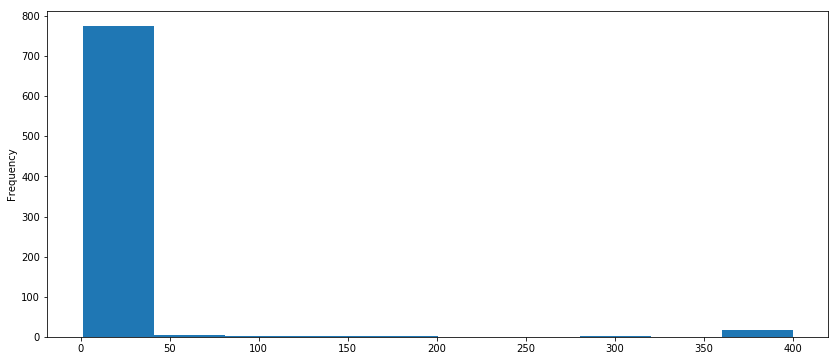

In [9]:
plt.figure(figsize=(14, 6))
grouped_price['Price'].plot.hist()

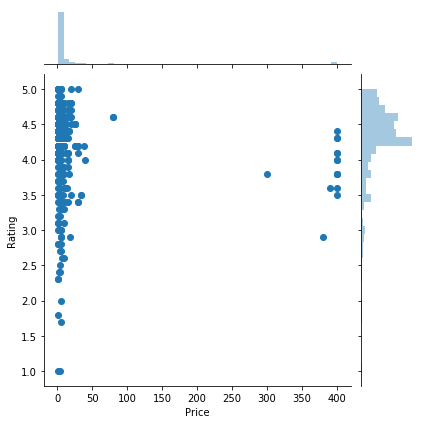

In [10]:
g = sns.jointplot(x="Price", y="Rating", data=grouped_price)

### Wniosek: większość aplikacji znajduje się w przedziałe 1..30. Rating tych aplikacji nie bardzo zależy od ceny, lecz drogi aplikacje (300-400) mają średnie wysoką ocenę.   

In [11]:
most_expansive = grouped_price[grouped_price['Price']>150]
most_expansive

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


<Figure size 1080x720 with 0 Axes>

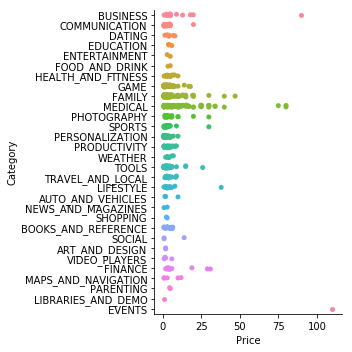

In [12]:
plt.figure(figsize=(15, 10))
grouped_price = grouped_price[grouped_price['Price']<150]
g = sns.catplot(x="Price", y="Category", data=grouped_price)

### Wniosek: najdroższe aplikacje są w kategoriach Medical, Family, są kilka wyjątków w Events, Lifestyle, Business. Reszta jest mniej od 30. 

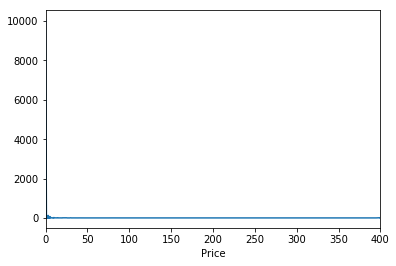

In [13]:
grouped_price = price_number.groupby("Price").count()
grouped_price["App"].index
grouped_price["App"].plot()


Jak widać nie ma za wiele drogich aplikacji

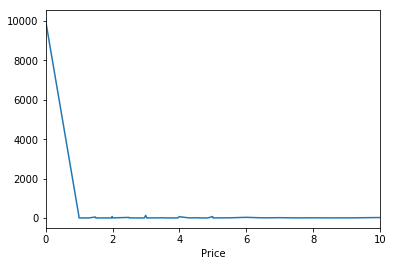

In [14]:
grouped_price.drop([10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0])["App"].plot()

In [15]:
total = grouped_price["App"].sum()
less_than_one_and_a_half = grouped_price["App"].loc[0:1.5].sum()
print("Aplikacje o cenie < 1.5 $ stanowią", less_than_one_and_a_half / total, "% całości")

Aplikacje o cenie < 1.5 $ stanowią 0.9448390369892077 % całości


### Wniosek: aplikacje o cenie < 1.5 stanowią wiekszość wszystkich płatnych aplikacji. 

## Analiza ratingu

In [16]:
df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [17]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

### Wyrzucamy anomalię

In [18]:
anomaly = df["Rating"] == 19.0
df[anomaly]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
df = df.drop(i)

In [21]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

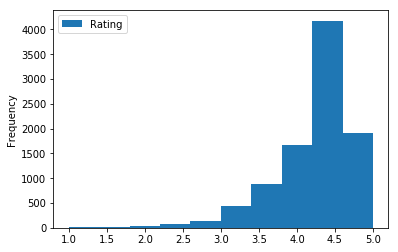

In [22]:
df.plot.hist(by="Rating")

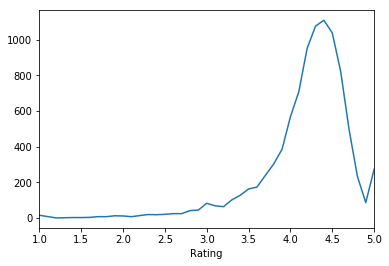

In [23]:
counted_ratings = df.groupby("Rating").count()["App"]
counted_ratings.plot()

In [24]:
wrongs = 0
for i in df["Reviews"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Wartość nie jest liczbą: ", i)
        
print("Kolumna zawiera: ", wrongs, " wartości, które nie są liczbami.")

Kolumna zawiera:  0  wartości, które nie są liczbami.


### Wniosek: większość aplikacji jest dobrze oceniania (w ramach 4.0-4.5)

## Installs

In [25]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

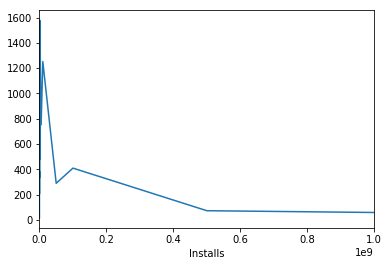

In [26]:
def installs_to_int(install):
    if install in ["0", "0+", "Free"]:
        return 0
    install = install.replace(",", "")[:-1]
    return int(install)


with_installs_as_integers = df.copy()
with_installs_as_integers["Installs"] = df["Installs"].apply(installs_to_int)

counted = with_installs_as_integers.groupby("Installs").count()
counted["App"].plot()

Obcięcie skrajnie największych wartości


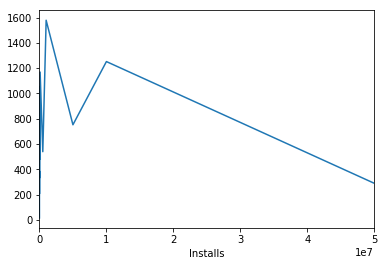

In [27]:
print("Obcięcie skrajnie największych wartości")
counted["App"][:-3].plot()


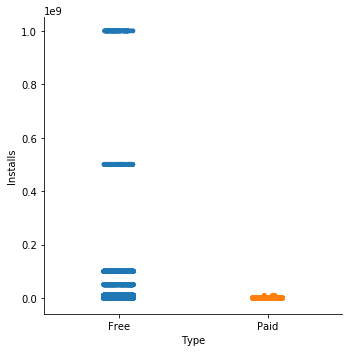

In [28]:
g = sns.catplot(x = 'Type', y = 'Installs', data=with_installs_as_integers)

### Wniosek: Płatne aplikacje instalują znacznie rzadziej niż bezpłatne. 

### Jak są związane oceny oraz lizby instalacji? 

In [29]:
sns.set(rc={'figure.figsize':(18.7,8.27)})

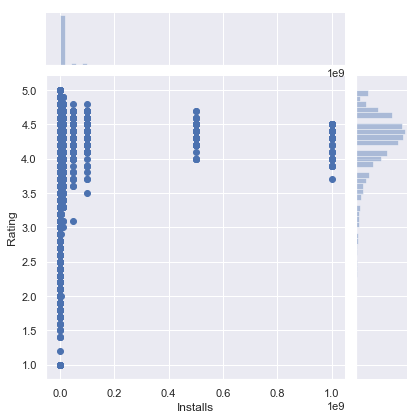

In [30]:
g = sns.jointplot(y='Rating', x='Installs', data=with_installs_as_integers)

### Wniosek: Mała liczba instalacji nie ma wpływu na ocenę, jednak duża liczba prawie zawsze oznacza dość wysoką ocenę. 

## Typ aplikacji(płatna/bezpłatna)

In [31]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

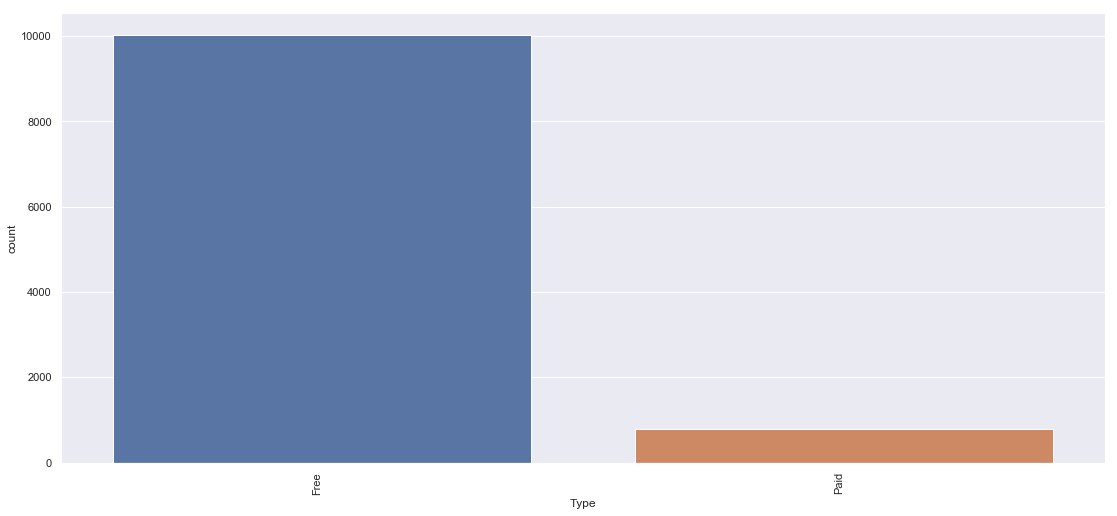

In [32]:
g = sns.countplot(x='Type', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Większość aplikacji jest bezpłatna

In [33]:
paid = df[df['Type']=='Paid']
free = df[df['Type']=='Free']
paid = paid[['Type', 'Rating']].groupby(by='Type').mean()
free = free[['Type', 'Rating']].groupby(by='Type').mean()
print(f'Średni rating dla płatnych: {paid.iloc[0, 0]} Średni rating dla bezpłatnych: {free.iloc[0, 0]}')

Średni rating dla płatnych: 4.266615146831529 Średni rating dla bezpłatnych: 4.186202546163562


### Wniosek: Typ aplikacji ma mały wpływ na ocenę

## Wersji

In [34]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

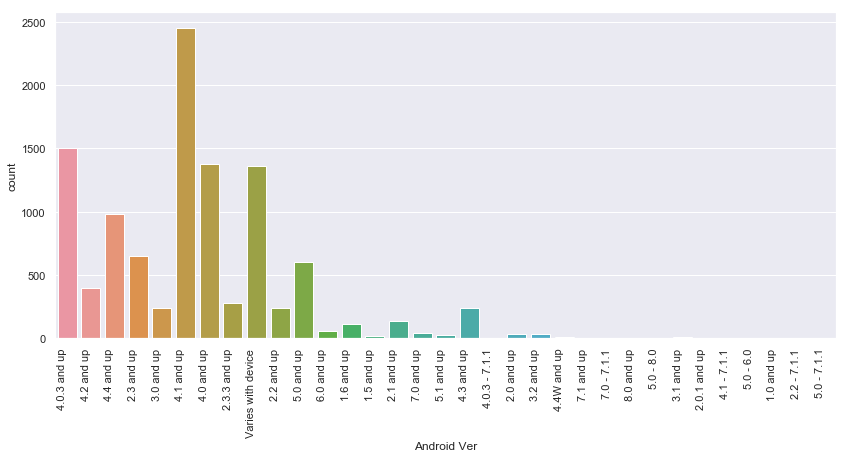

In [35]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Android Ver', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniana: 3.1 and up, najbardziej oceniana: 5.0 - 6.0


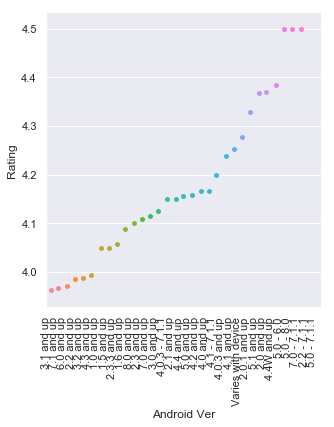

In [36]:
categories = df[['Android Ver', 'Rating']].groupby('Android Ver').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniana: {najm}, najbardziej oceniana: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Android Ver', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

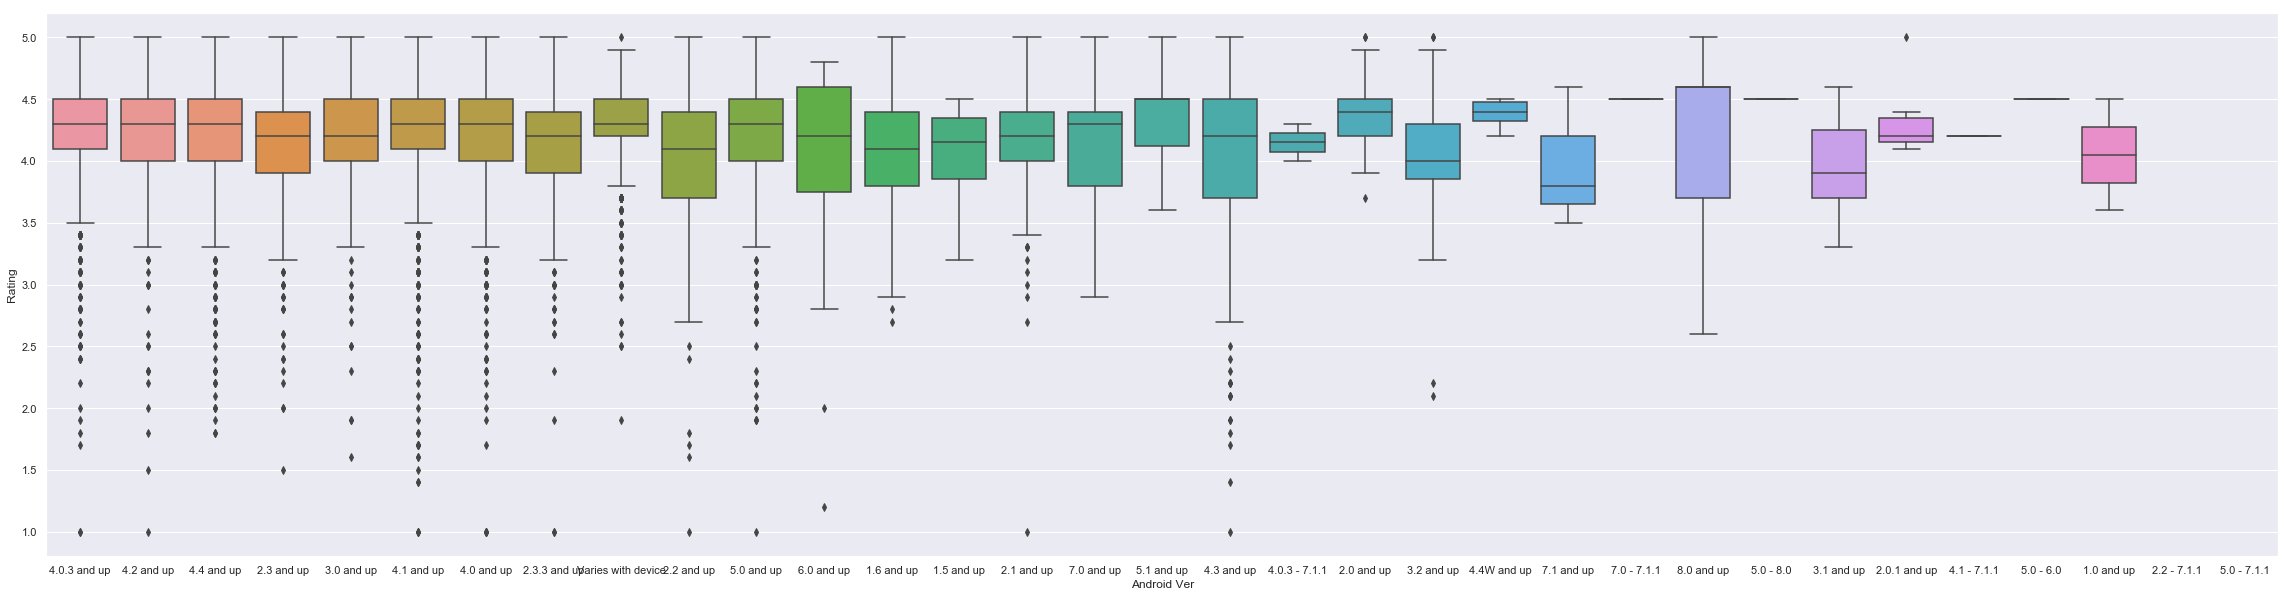

In [37]:
import matplotlib
matplotlib.use('Agg')
plt.figure(figsize=(40,10))
ax = sns.boxplot(x="Android Ver", y="Rating", data=df)

## Rating kontentu

In [38]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

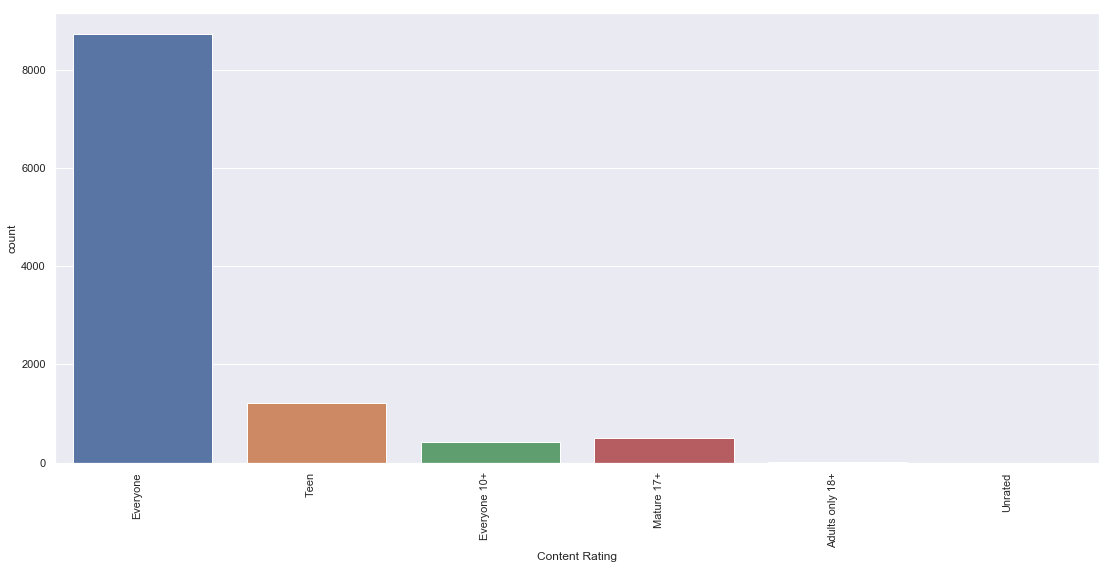

In [39]:
g = sns.countplot(x='Content Rating', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniania: Unrated, najbardziej oceniania: Adults only 18+


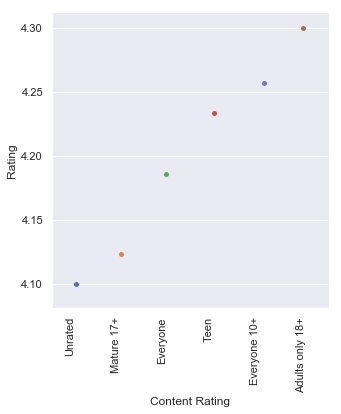

In [40]:
categories = df[['Content Rating', 'Rating']].groupby('Content Rating').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniania: {najm}, najbardziej oceniania: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Content Rating', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

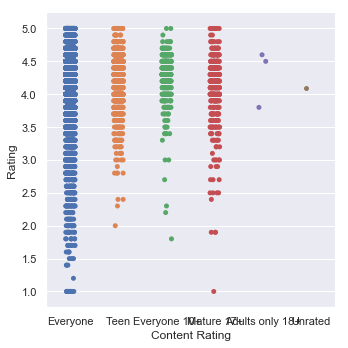

In [41]:
g = sns.catplot(x='Content Rating', y='Rating', data=df)

In [42]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


### Za wyróżnieniem kilka aplikacji "tylko dla dorosłych" cecha Content Rating nie ma dużego wpływu na ocenę. 

## Rodzaje aplikacji

In [43]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

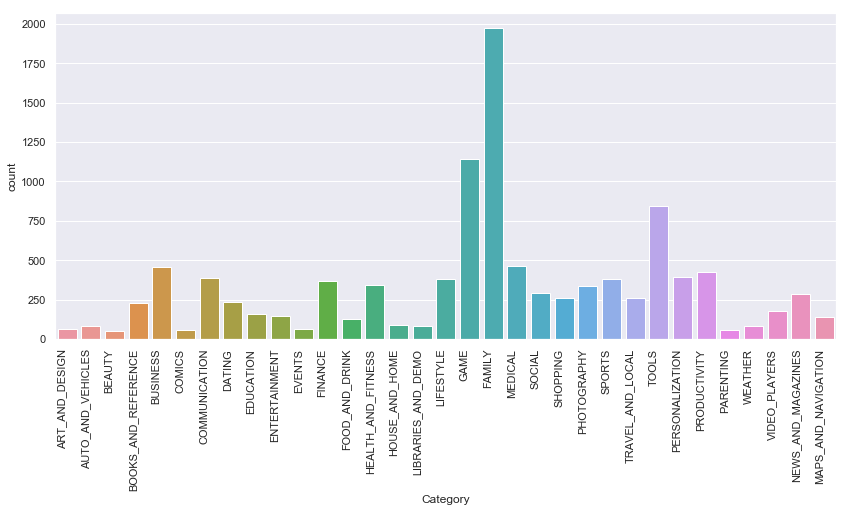

In [44]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Category', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

#### Wniosek: największa ilość aplikacji są w kategorach Game i Family

Najmniej oceniana: DATING, najbardziej oceniana: EVENTS


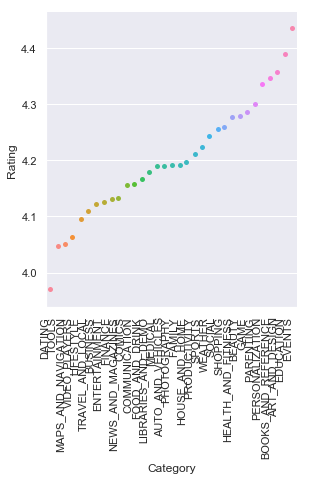

In [45]:
categories = df[['Category', 'Rating']].groupby('Category').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniana: {najm}, najbardziej oceniana: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Category', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

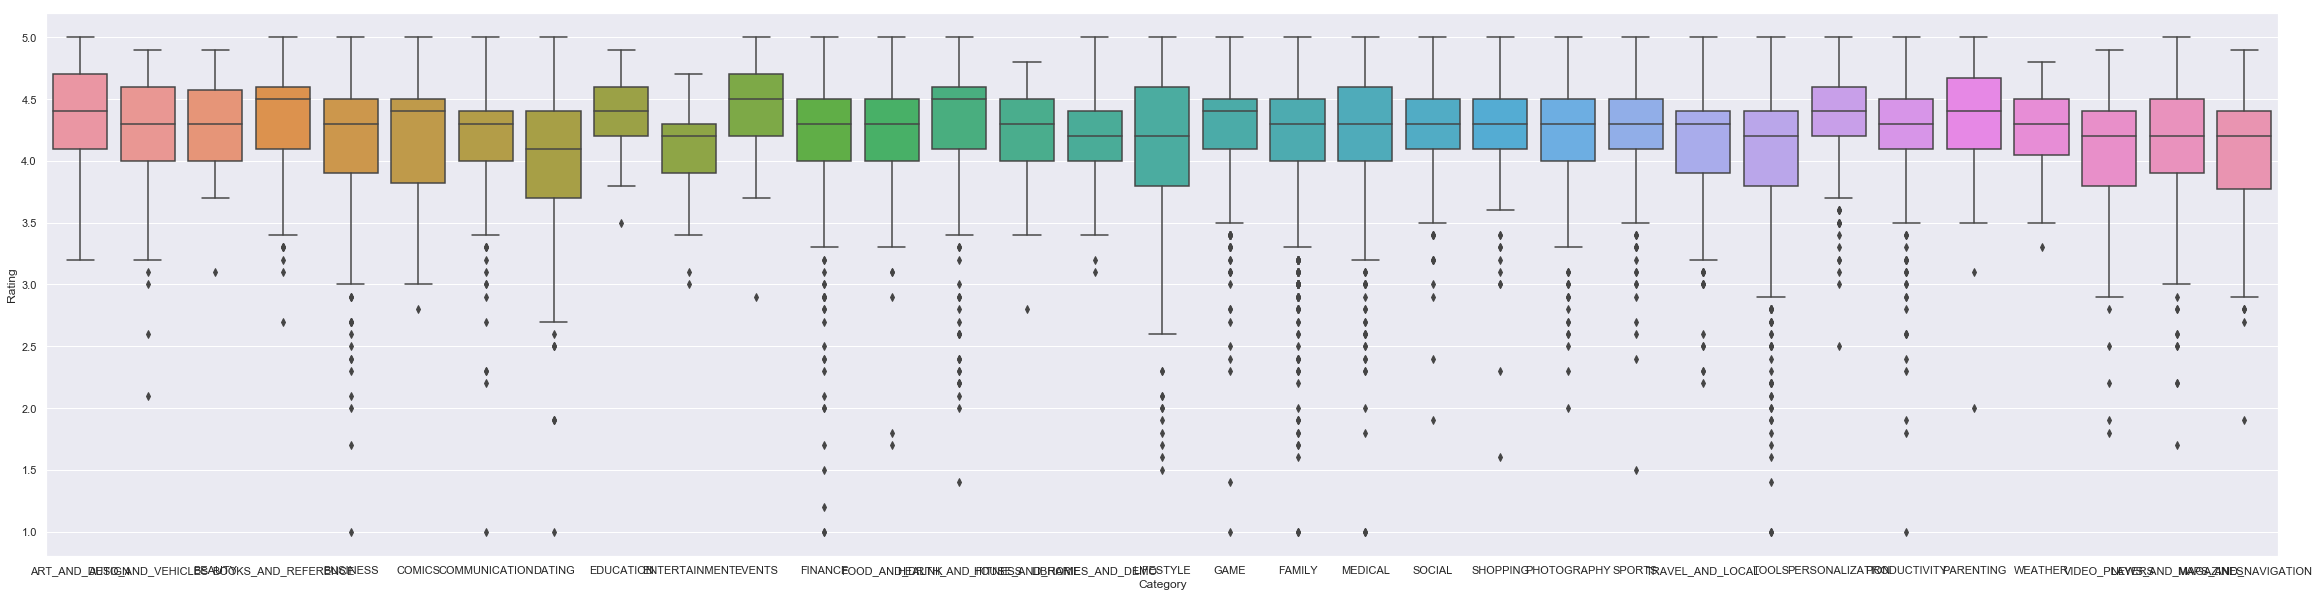

In [46]:
plt.figure(figsize=(40,10))
ax = sns.boxplot(x="Category", y="Rating", data=df)

## Gatunki

In [47]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

## Current ver

In [48]:
df.loc[df["Current Ver"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 2, 2018",Varies with device,4.0.3 and up


In [49]:
len(df["Current Ver"].unique())

2832

##  Pierwsze wnioski:
- Mamy 9367 niepustych obiektów w interesującej nas kolumnie **Rating**, wartości docelowo powinny wachać się w przedziale 1.0 -5.0, ale znajduje się jedna wartość 19.0.
- Z analizy kwantyli wynika, że ponad **75%** wszystkich istniejących **Ratingów** ma wartość **równą bądź wyższą 4.0**, bezpiecznym jest zatem stwierdzenie, ze możemy zastąpić brakujace wartości wartością równą medianie ( 4.30 )
- Wszystkie rekordy mają wartość w kolumnie **Price**, jest to jednak obecnie napis - zawiera symbol dolara plus wartość liczbową, znajduje się także etykieta Everyone. Wszystkie wartości możemy zastąpić zwykłą wartością liczbową pozbywając sie symbolu waluty, a wartość Everyone zastąpić zerem.
- Wartości w kolumnie **Reviews** są liczbami, z 1 wyjątkiem, który można po prostu zastąpić wartością liczbową 3.0M - 3 000 000 
- Kolumna **Installs** zawiera wartości kategoryczne, nie ciągłe - może zostać zastąpiona wartościami liczbowymi bez większego enkodowania bo jest kategoryczna porządkowa. Co więcej dominują mało popularne aplikacje.
- Kolumna **Type** zawiera jedynie informację czy aplikacja jest płatna, czy darmowa - można zastąpić binarną reprezentacją.
- Kolumna **Size** może być wartością liczbową -> wartości kategoryczne porządkowe. Problem napotykamy z wartościami rozmiaru różnymi dla różnych urżadzeń - warto dobrać wartość nie zmieniającą mediany.
- Kolumna **AndroidVer** może zostać zastąpiona wartością liczbową(flaot z najniższej dopuszczalnej wersji) - trzeba jednak znaleźć największą wartosć nie zmieniającą mediany, którą zastąpimy "Varies with device".
- Kolumna **Genres** jest rozszerzeniem kolumny **Category**, zawierającą dane jakościowe nominalne, co implikuje problem z jednoznacznym enkodowaniem - w pierwszej wersji opracowania danych pozbędziemy się tej kolumny celem zachowania gęstości macierzy dancyh. (Enkodowanie danych jakościowych metodą onehot stworzyło by rzadkie kolumny)
- Kolumna **Last Update** może zostać zastąpiona wynikiem różnicy jej zawartości z aktualną datą, dzięki czemu dostaniemy wartości numeryczne o istotnym znaczeniu (im większa wartość, tym bardziej aktualna jest aplikacja)
- Kolumna **Current Ver** daje nam znikomą ilość informacji przy porównywaniu rekordu z innymi - jest to cecha autonomiczna każdej aplikacji. Jedynie może wskazywać na rozwijalnosć aplikacji - im wyższa wersja tym więcej "unowocześnień" wdrożono. Dodatkowo, posiada ponad 2800 różnych wartości co wyklucza jej sensowne enkodowanie. Wartości są nieciągłe. Kolumnę można usunąć (usunięcie jedynie rekordów nam nie pasujących "Varies with device" powoduje usunięcie prawie 15% danych, co jest znaczącym ubytkiem).
- Kolumny **Current Ver, Size, Android Ver** wykazują zależność dla wartości "Varies with device", gdy znajduje się w jednej kolumnie to zazwyczaj pojawia się też w pozostałych
- Kolumna **App** zawierająca nazwę Aplikacji jest nam zbędna gdyż nie wnosi dodatkowych informacji

## Przygotowanie danych

In [92]:
import re
import sys

import time
import datetime

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [70]:
playstore_df = pd.read_csv("./dane/googleplaystore.csv")

In [71]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Stworzenie osobnej tablicy z danymi, nie posiadającymi rating

In [72]:
without_rating = df[df['Rating'].isnull()]
without_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


### Zastąpienie niepasujących wartości Ratings medianą

In [73]:
playstore_df['Rating'] = playstore_df['Rating'].fillna(playstore_df['Rating'].median())

### Encodowanie Current Ver

In [74]:
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    playstore_df['Current Ver'] = playstore_df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    playstore_df['Current Ver'] = playstore_df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

playstore_df['Current Ver'] = playstore_df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
playstore_df['Current Ver'] = playstore_df['Current Ver'].fillna(playstore_df['Current Ver'].median())

### Wyrzucenie anomalii z Category oraz zmiana wartości None w pozostałuch kolumnach

In [75]:
i = playstore_df[playstore_df['Category'] == '1.9'].index
playstore_df.loc[i]
playstore_df = playstore_df.drop(i)
playstore_df = playstore_df[pd.notnull(playstore_df['Last Updated'])]
playstore_df = playstore_df[pd.notnull(playstore_df['Content Rating'])]

### Encodowanie App

In [76]:
le = LabelEncoder()
playstore_df['App'] = le.fit_transform(playstore_df['App'])

### Encodowanie Category

In [77]:
category_list = playstore_df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
playstore_df = pd.concat([playstore_df, pd.get_dummies(playstore_df['Category'], prefix='cat')], axis=1)

### Encodowanie Genres

In [78]:
le = LabelEncoder()
playstore_df['Genres'] = le.fit_transform(playstore_df['Genres'])

### Encodowanie Category

le = LabelEncoder()
playstore_df['Category'] = le.fit_transform(playstore_df['Category'])

### Encodowanie Content Rating

In [79]:
le = LabelEncoder()
playstore_df['Content Rating'] = le.fit_transform(playstore_df['Content Rating'])

### Zmiana Price

In [80]:
playstore_df['Price'] = playstore_df['Price'].apply(lambda x : x.strip('$'))

### Zmiana Installs

In [81]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

### Encodowanie Type: Free\Paid na 0\1

In [82]:
playstore_df['Type'] = pd.get_dummies(playstore_df['Type'])

### Encodowanie Last Updated na normalne liczby

In [83]:
playstore_df['Last Updated'] = playstore_df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

### Zmiania size, przekształcenie kb na mb

In [84]:
k_indices = playstore_df['Size'].loc[playstore_df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(playstore_df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
playstore_df.loc[k_indices,'Size'] = converter
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: x.strip('M'))
playstore_df[playstore_df['Size'] == 'Varies with device'] = 0
playstore_df['Size'] = playstore_df['Size'].astype(float)

### Wyniki

In [85]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6962,ART_AND_DESIGN,4.1,159,19.0,10000,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,2632,ART_AND_DESIGN,3.9,967,14.0,500000,1,0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,8656,ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,7827,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,7022,ART_AND_DESIGN,4.3,967,2.8,100000,1,0,1,11,...,0,0,0,0,0,0,0,0,0,0


In [161]:
playstore_df = playstore_df[(playstore_df[['Installs']] != 0).all(axis=1)]

In [163]:
playstore_df.describe()

,App,Rating,Size,Type,Content Rating,Genres,Last Updated,Current Ver,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
count,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000,9.145000e+03,9.145000e+03,9145.000000,9145.000000,...,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000,9145.000000
mean,4796.351340,4.193384,21.516165,0.920831,1.449535,63.488354,1.508777e+09,8.968841e+25,0.006780,0.008201,...,0.038819,0.027775,0.033133,0.021979,0.022963,0.034008,0.080809,0.020995,0.014325,0.006233
std,2780.966508,0.502702,22.589085,0.270017,0.993470,32.815997,3.552777e+07,8.576857e+27,0.082064,0.090193,...,0.193174,0.164336,0.178993,0.146624,0.149795,0.181259,0.272557,0.143375,0.118832,0.078707
min,0.000000,1.000000,0.008000,0.000000,0.000000,0.000000,1.274393e+09,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2375.000000,4.100000,4.900000,1.000000,1.000000,38.000000,1.500674e+09,1.100000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4778.000000,4.300000,13.000000,1.000000,1.000000,67.000000,1.524780e+09,1.900000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7197.000000,4.500000,30.000000,1.000000,1.000000,91.000000,1.531692e+09,3.530000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9658.000000,5.000000,100.000000,1.000000,5.000000,118.000000,1.533679e+09,8.202005e+29,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
playstore_df.isnull().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Installs                   0
Type                       0
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Current Ver                0
Android Ver                2
cat_ART_AND_DESIGN         0
cat_AUTO_AND_VEHICLES      0
cat_BEAUTY                 0
cat_BOOKS_AND_REFERENCE    0
cat_BUSINESS               0
cat_COMICS                 0
cat_COMMUNICATION          0
cat_DATING                 0
cat_EDUCATION              0
cat_ENTERTAINMENT          0
cat_EVENTS                 0
cat_FAMILY                 0
cat_FINANCE                0
cat_FOOD_AND_DRINK         0
cat_GAME                   0
cat_HEALTH_AND_FITNESS     0
cat_HOUSE_AND_HOME         0
cat_LIBRARIES_AND_DEMO     0
cat_LIFESTYLE              0
cat_MAPS_AND_NAVIGATION    0
cat_MEDICAL                0
cat_NEWS_AND_M

## Analiza danych przekształconych

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


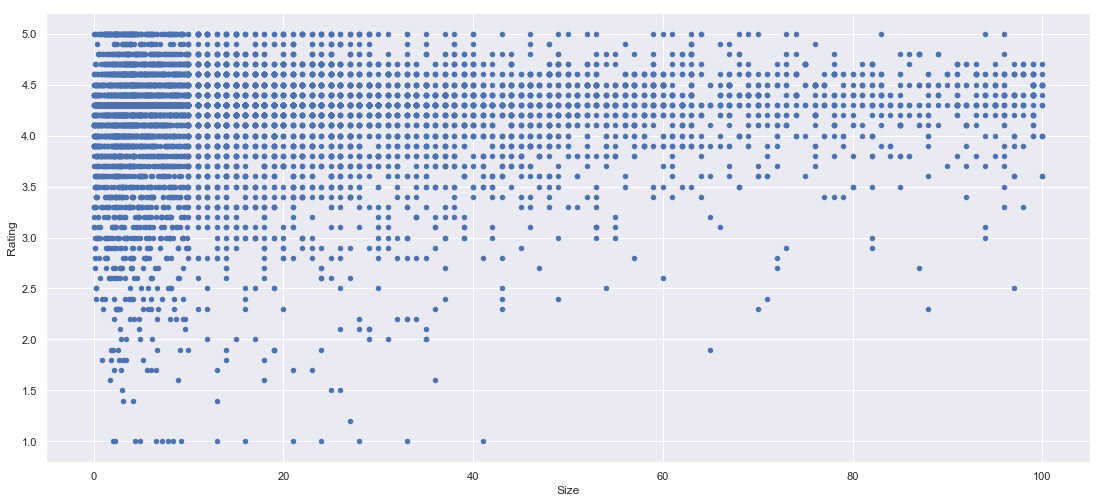

In [165]:
playstore_df.plot(kind='scatter', x='Size', y='Rating')

### Badanie wyczyszczonego Size

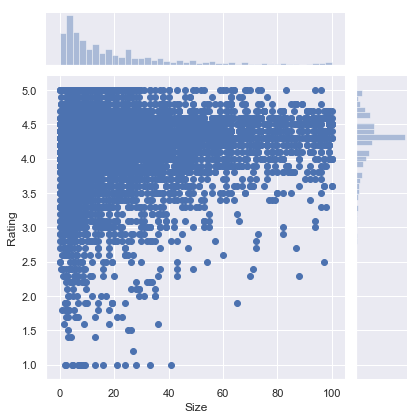

In [166]:
sns.jointplot(x='Size', y='Rating', data=playstore_df)

In [167]:
heavy = playstore_df[playstore_df['Size'] > 95]

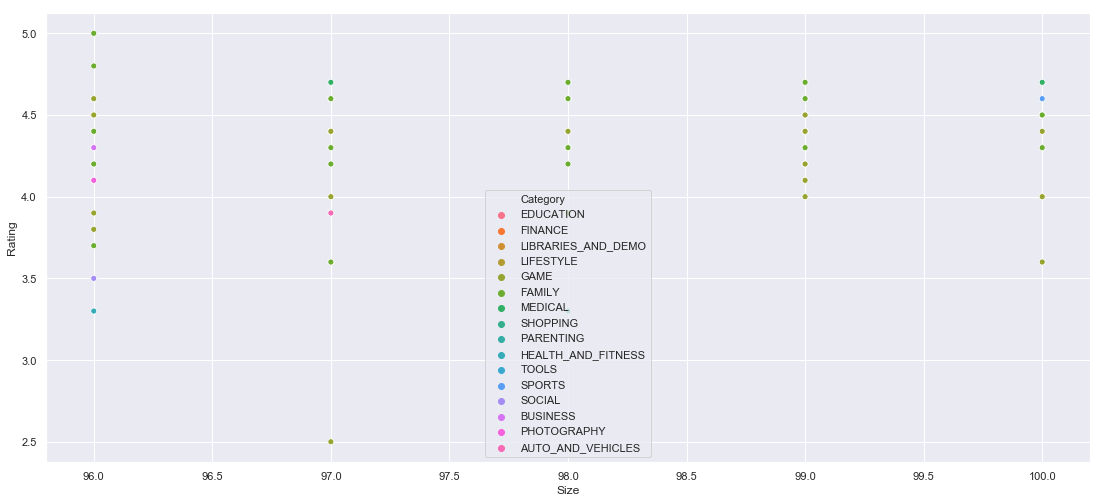

In [168]:
sns.scatterplot(x=heavy['Size'], y=heavy['Rating'], hue=heavy['Category'])

#### Wniosek: większość najlepiej ocenianych aplikacji zajmuje mniej 30 MB pamięci. Bardzo duże aplikację w całem mają dobre oceny. 

### Standaryzacja

In [169]:
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated']
features.extend(category_list)


In [170]:
min_max_scaler = MinMaxScaler()
column_names_to_normalize = features
stand_df = playstore_df.copy()
x = stand_df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = stand_df.index)
stand_df[column_names_to_normalize] = df_temp

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [171]:
stand_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6962,ART_AND_DESIGN,4.1,0.000004,0.189935,0.00001,1.0,0.0,0.2,0.076271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2632,ART_AND_DESIGN,3.9,0.000022,0.139931,0.00050,1.0,0.0,0.2,0.101695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8656,ART_AND_DESIGN,4.7,0.001949,0.086927,0.00500,1.0,0.0,0.2,0.076271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7827,ART_AND_DESIGN,4.5,0.004803,0.249940,0.05000,1.0,0.0,0.8,0.076271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7022,ART_AND_DESIGN,4.3,0.000022,0.027922,0.00010,1.0,0.0,0.2,0.093220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
X = playstore_df[features]
y = playstore_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [173]:
X = stand_df[features]
y = stand_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

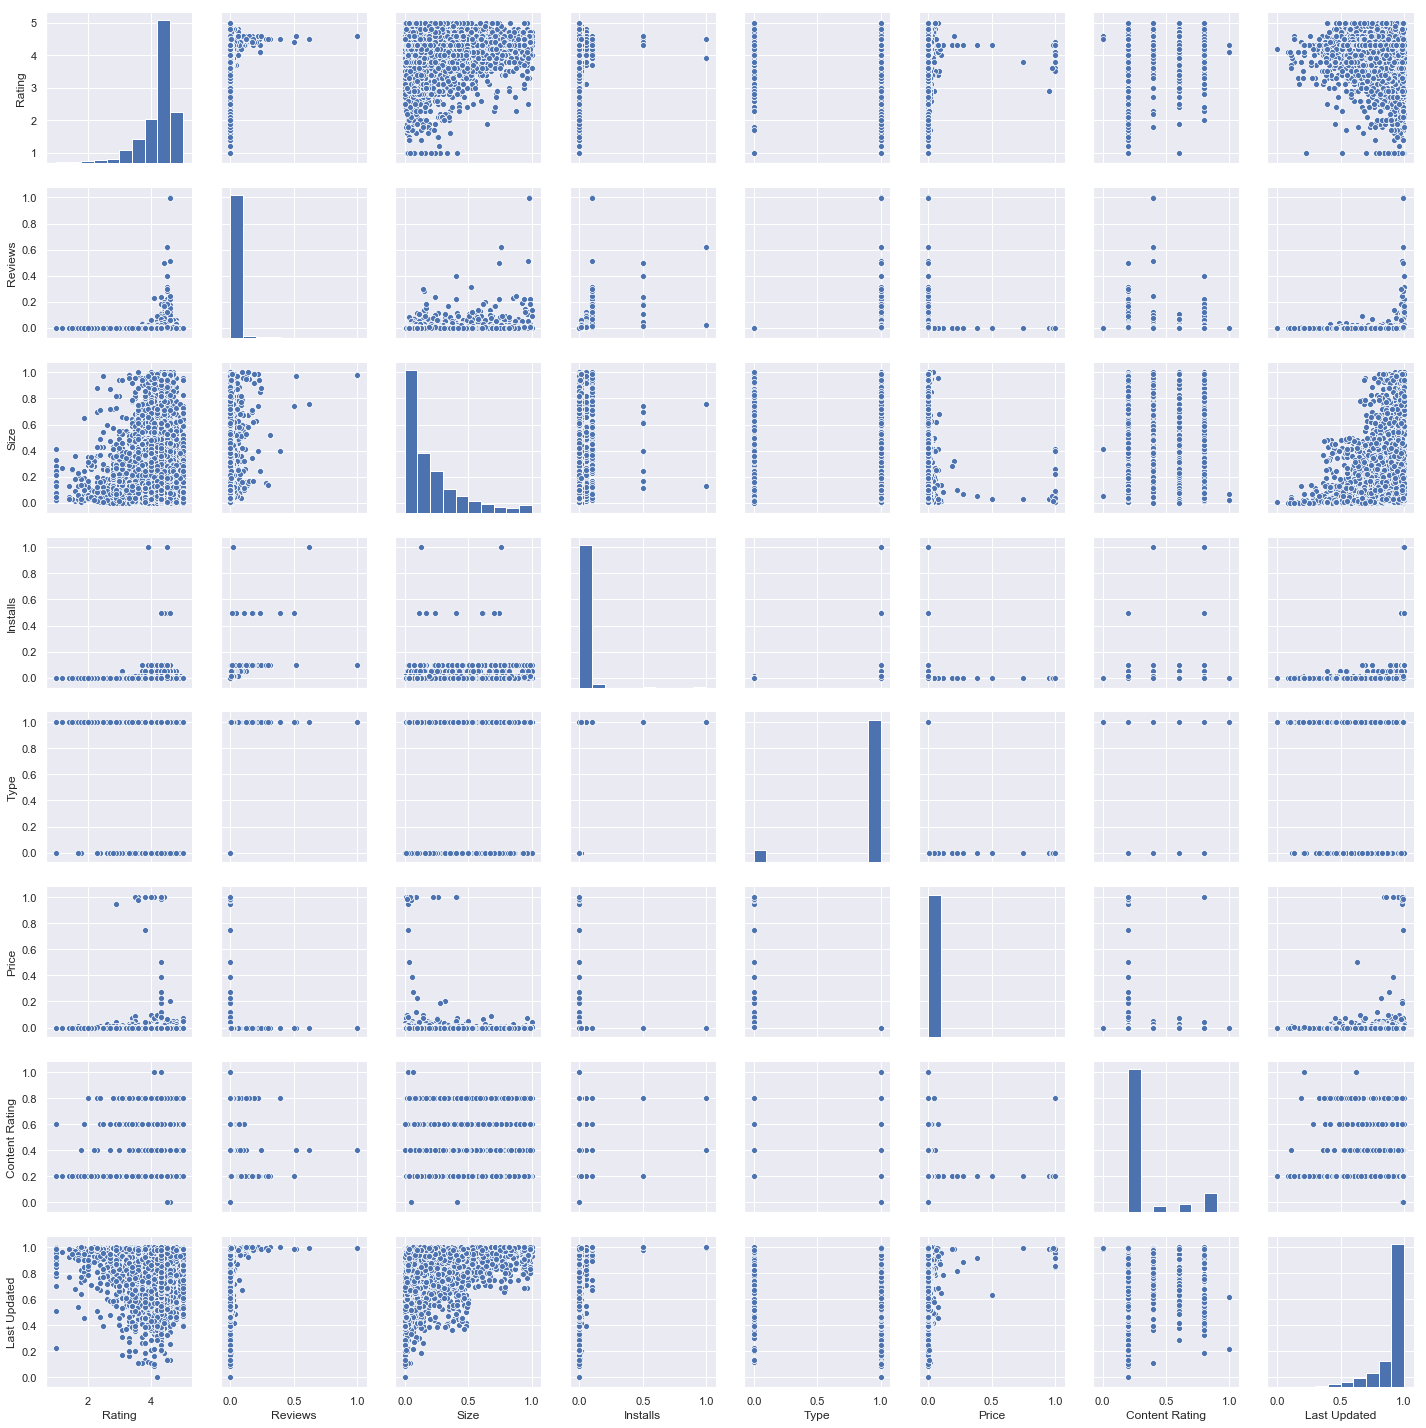

In [174]:
columns = ['Rating','Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated']
sns.pairplot(stand_df[columns])

## Zbadanie korelacji

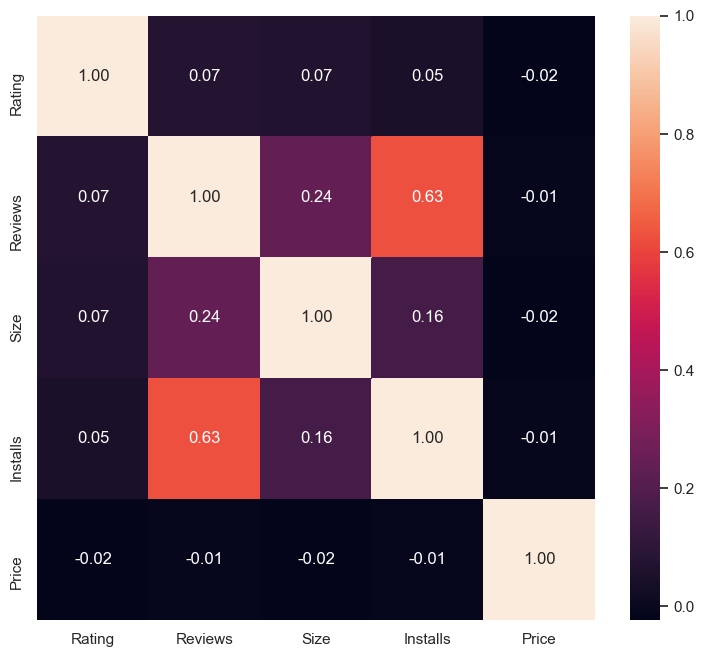

In [189]:
heat_atr=['Rating', 'Reviews', 'Size', 'Installs', 'Price']
plt.figure(figsize=(9,8), dpi = 100)
sns.heatmap(stand_df[heat_atr].corr(), annot=True, fmt='.2f')

## Wniosek: są mocne skorelowane liczby instalacji i opinii. To wynika z tego, że użytkownik zostawia opinię dopiero po pobraniu aplikacji. 

# Teza

Po analizie danych udało się znaleźć kilka wniosków, dotyczących zależności pomiędzy cechami. Zdecydowaliśmy, że będziemy regresować wartość oceny. Zakladamy, że wysoką ocenę dostają drogie aplikacje z dużą liczbą instalacji, o "wzrosłej" treści, w kategoriach Medical, Business and Financial. Ocenę niską mają aplikacji typu "dating". Chcemy również poprzez przeprowadzenie regresji dowiedzieć się więcej o czynnikach, które mogą mieć wpływ na ocenę.   

# Model

In [194]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0).fit(X_train, y_train)
for feature, coef in zip(list(features), regr.coef_):
    if coef != 0:
        print(f'Cecha: {feature},      Współczynnik: {coef}')
    

Cecha: Reviews,      Współczynnik: 1.783761599274643e-08
Cecha: Installs,      Współczynnik: -7.186974216701231e-11
Cecha: Genres,      Współczynnik: -0.0004261114976624205
Cecha: Last Updated,      Współczynnik: 1.562274436887823e-09


## Random Forest

[(10, 0.9268408376701067),
 (20, 0.9327628444558144),
 (30, 0.9321201426321426),
 (40, 0.9332515768568412),
 (50, 0.9334138097936373),
 (60, 0.9341514989604046),
 (70, 0.9335590340403309),
 (80, 0.9341302087645458),
 (90, 0.934602558939499),
 (100, 0.9339697952916098),
 (110, 0.934138999103276),
 (120, 0.9354225701344504),
 (130, 0.9345123297946621),
 (140, 0.9348130657690448),
 (150, 0.9345530087814995),
 (160, 0.9347287405872543),
 (170, 0.9358996559097836),
 (180, 0.9350884360435189),
 (190, 0.9346607102180626)]

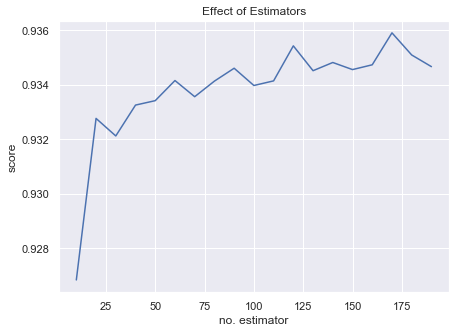

In [101]:
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

## Linear regression

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_test, y_test)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9281037239057278


### Ridge

In [270]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print("training score:", train_score) 
print("test score: ", test_score)

training score: 0.9166979249033163
test score:  0.9280255052556772


In [87]:


lambdas = [ i for i in np.linspace(0, 10, 1001)]
lambdas_less_10 = []
print(lambdas[0])
for i in range(2,len(lambdas)):
    if 24 * lambdas[i - 1] <= 10:
        lambdas_less_10 += [24 * lambdas[i - 1]] 
    else:
        break
print(lambdas_less_10)     

        
params = [
    {'alpha' : lambdas_less_10},
]

model = Ridge()

grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error',
                          return_train_score=True, cv=5)
grid_search.fit(X=X_train, y=y_train)

grid_search.best_estimator_

0.0
[0.24, 0.48, 0.72, 0.96, 1.2000000000000002, 1.44, 1.6800000000000002, 1.92, 2.16, 2.4000000000000004, 2.64, 2.88, 3.12, 3.3600000000000003, 3.5999999999999996, 3.84, 4.08, 4.32, 4.5600000000000005, 4.800000000000001, 5.04, 5.28, 5.5200000000000005, 5.76, 6.0, 6.24, 6.48, 6.720000000000001, 6.959999999999999, 7.199999999999999, 7.4399999999999995, 7.68, 7.92, 8.16, 8.4, 8.64, 8.879999999999999, 9.120000000000001, 9.36, 9.600000000000001, 9.84]


C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.64288e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.62084e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.60908e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.64458e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.63526e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.14293e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.26932e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.25277e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.24989e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.26987e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.25135e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.24902e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.37347e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.34796e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.34151e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.31083e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.35399e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.35425e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.4767e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.44108e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.41287e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.40143e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.45527e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.45901e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.57921e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\strai\Anaconda3\lib\site-packages\sklearn\linear_model\r

Ridge(alpha=0.24, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
grid_search.best_params_

{'alpha': 0.24}

In [89]:
cechy = {}
for feature, coef in zip(list(X.columns), ridge.coef_):
    if coef != 0:
        print(f'Cecha: {feature},      Współczynnik: {coef}')
    cechy[coef] = feature
    
sorted_keys = sorted(cechy.keys(), reverse = True)
sorted_vals = [cechy[key] for key in sorted_keys]



Cecha: Reviews,      Współczynnik: 1.6250189110476374e-08
Cecha: Size,      Współczynnik: -0.0004329742639921454
Cecha: Installs,      Współczynnik: -5.358615158395326e-11
Cecha: Type,      Współczynnik: -0.12752832175202092
Cecha: Price,      Współczynnik: -0.0011694314438023695
Cecha: Content Rating,      Współczynnik: -0.00022548346384708683
Cecha: Genres,      Współczynnik: 5.5007124635770275e-05
Cecha: Last Updated,      Współczynnik: 2.7573959641883337e-09
Cecha: cat_ART_AND_DESIGN,      Współczynnik: 0.2562928938674467
Cecha: cat_AUTO_AND_VEHICLES,      Współczynnik: 0.028057315477302724
Cecha: cat_BEAUTY,      Współczynnik: 0.19015806415893452
Cecha: cat_BOOKS_AND_REFERENCE,      Współczynnik: 0.2972203320014397
Cecha: cat_BUSINESS,      Współczynnik: 0.15957082057266664
Cecha: cat_COMICS,      Współczynnik: 0.06366266069413255
Cecha: cat_COMMUNICATION,      Współczynnik: 0.10019736639536797
Cecha: cat_DATING,      Współczynnik: -0.04877555938424684
Cecha: cat_EDUCATION,      W

In [271]:
def najlepsze_cechy2(n):
    reg = LinearRegression()
    prev = []
    cechy =  features
    for i in range(n):    
        cechy_testowe = {}
        best = {}    
        for i, value in enumerate(cechy):
            tmp = prev + [value]
            blad = cross_val_score(reg, X_train[tmp], y_train, cv=5, scoring="neg_mean_squared_error")
            rmse_cv_error = np.sqrt(sum(blad * -1) / 5)
            cechy_testowe[rmse_cv_error] = value
            
        if cechy_testowe:
            lowest_error = sorted(cechy_testowe.keys())[0]
            prev += [cechy_testowe[lowest_error]]
            best[lowest_error] = prev
            cechy.remove(cechy_testowe[lowest_error])
        
        
    return list(best.values()), list(best.keys())


for i in range(1,8):
    print(najlepsze_cechy2(i))


([['Last Updated']], [0.4660448858397902])
([['Type', 'Genres']], [0.9611161895076009])
([['Content Rating', 'Size', 'cat_TOOLS']], [1.3342229542277677])
([['cat_FAMILY', 'cat_GAME', 'cat_MEDICAL', 'cat_PERSONALIZATION']], [1.50514270187547])
([['cat_BUSINESS', 'cat_SPORTS', 'cat_LIFESTYLE', 'Reviews', 'cat_PRODUCTIVITY']], [1.5592477373157048])
([['Installs', 'cat_HEALTH_AND_FITNESS', 'cat_FINANCE', 'cat_BOOKS_AND_REFERENCE', 'cat_PHOTOGRAPHY', 'cat_SHOPPING']], [1.5618396476066208])
([['cat_COMMUNICATION', 'cat_SOCIAL', 'cat_NEWS_AND_MAGAZINES', 'cat_EDUCATION', 'cat_TRAVEL_AND_LOCAL', 'cat_DATING', 'cat_ART_AND_DESIGN']], [1.5672476343056645])
